<a href="https://colab.research.google.com/github/octaviasst/LEARN-CNN/blob/main/H1_P070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KETERANGAN DATA :

id pasien : p070- LOG0712075018.csv

weight : 79 kg

siastolik BP : 140

diastolik BP : 90

In [ ]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 9.9 MB/s 


In [ ]:
!pip install hrv-analysis

In [ ]:
!pip install pyhrv

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CNN-TESIS/PERCOBAANKU/HRV-ANALIZER/SAMPEL-DATA/P075.csv',  header=None)
ppg_and_ecg=np.array(df)

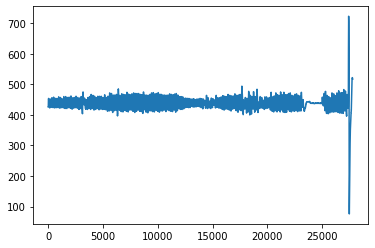

In [ ]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy import signal
from scipy.integrate import trapz
from scipy.interpolate import interp1d
import seaborn as sns
from matplotlib.patches import Ellipse

ppg_simulated=pd.read_csv('/content/drive/MyDrive/CNN-TESIS/PERCOBAANKU/HRV-ANALIZER/SAMPEL-DATA/P075.csv')
plt.plot(ppg_simulated)
plt.show()

time domain analyze

In [ ]:
def timedomain(rr):
    results = {}

    hr = 60000/rr
    
    results['Mean RR (ms)'] = np.mean(rr)
    results['STD RR/SDNN (ms)'] = np.std(rr)
    results['Mean HR (Kubios\' style) (beats/min)'] = 60000/np.mean(rr)
    results['Mean HR (beats/min)'] = np.mean(hr)
    results['STD HR (beats/min)'] = np.std(hr)
    results['Min HR (beats/min)'] = np.min(hr)
    results['Max HR (beats/min)'] = np.max(hr)
    results['RMSSD (ms)'] = np.sqrt(np.mean(np.square(np.diff(rr))))
    results['NNxx'] = np.sum(np.abs(np.diff(rr)) > 50)*1
    results['pNNxx (%)'] = 100 * np.sum((np.abs(np.diff(rr)) > 50)*1) / len(rr)
    return results

In [ ]:
def frequency_domain(rri, fs=4):
    # Estimate the spectral density using Welch's method
    fxx, pxx = signal.welch(x=rr_interpolated, fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    vlf = trapz(pxx[cond_vlf], fxx[cond_vlf])
    lf = trapz(pxx[cond_lf], fxx[cond_lf])
    hf = trapz(pxx[cond_hf], fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf

    # find which frequency has the most power in each band
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]

    # fraction of lf and hf
    lf_nu = 100 * lf / (lf + hf)
    hf_nu = 100 * hf / (lf + hf)
    
    results = {}
    results['Power VLF (ms2)'] = vlf
    results['Power LF (ms2)'] = lf
    results['Power HF (ms2)'] = hf   
    results['Power Total (ms2)'] = total_power

    results['LF/HF'] = (lf/hf)
    results['Peak VLF (Hz)'] = peak_vlf
    results['Peak LF (Hz)'] = peak_lf
    results['Peak HF (Hz)'] = peak_hf

    results['Fraction LF (nu)'] = lf_nu
    results['Fraction HF (nu)'] = hf_nu
    return results, fxx, pxx

In [ ]:
def plot_poincare(rr):
    rr_n = rr[:-1]
    rr_n1 = rr[1:]

    sd1 = np.sqrt(0.5) * np.std(rr_n1 - rr_n)
    sd2 = np.sqrt(0.5) * np.std(rr_n1 + rr_n)

    m = np.mean(rr)
    min_rr = np.min(rr)
    max_rr = np.max(rr)
    
    plt.figure(figsize=(10, 10))
    plt.title("Poincare plot")

    sns.scatterplot(x=rr_n, y=rr_n1, color="#51A6D8")

    plt.xlabel(r'$RR_n (ms)$')
    plt.ylabel(r'$RR_{n+1} (ms)$')

    e1 = Ellipse((m, m), 2*sd1, 2*sd2, angle=-45, linewidth=1.2, fill=False, color="k")
    plt.gca().add_patch(e1)

    plt.arrow(m, m, (max_rr-min_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)
    plt.arrow(m, m, (min_rr-max_rr)*0.4, (max_rr-min_rr)*0.4, color="k", linewidth=0.8, head_width=5, head_length=5)

    plt.arrow(m, m, sd2 * np.sqrt(0.5), sd2 * np.sqrt(0.5), color="green", linewidth=5)
    plt.arrow(m, m, -sd1 * np.sqrt(0.5), sd1 * np.sqrt(0.5), color="red", linewidth=5)

    plt.text(max_rr, max_rr, "SD2", fontsize=20, color="green")
    plt.text(m-(max_rr-min_rr)*0.4-20, max_rr, "SD1", fontsize=20, color="red")
    
    return sd1, sd2

In [ ]:
ppg = df[0]

In [ ]:
#ppg = ppg[:23000]

In [ ]:
ppg.ndim

1

In [ ]:
ppg.head()

0    424.97
1    425.97
2    425.97
3    426.97
4    439.97
Name: 0, dtype: float64

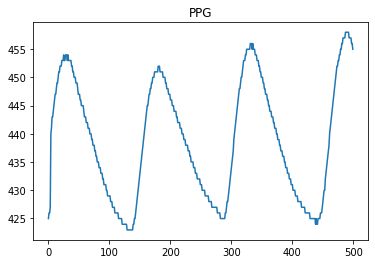

In [ ]:
plt.plot(ppg_and_ecg[0:500])
plt.title("PPG", color = "black")
plt.tick_params(axis="both", colors = "black")

--------------------------------------------------- alternatif-----------------------------------

In [ ]:
long = len(ppg)
long
long1 = long-1
long1

27799

posisi titik puncak : [   32.   181.   332.   489.   643.   792.   950.  1111.  1258.  1417.
  1587.  1746.  1903.  2073.  2226.  2376.  2534.  2697.  2852.  3001.
  3168.  3309.  3470.  3623.  3771.  3918.  4074.  4228.  4374.  4526.
  4686.  4839.  4990.  5150.  5306.  5456.  5607.  5770.  5929.  6076.
  6232.  6397.  6547.  6716.  6873.  7023.  7183.  7340.  7488.  7638.
  7797.  7956.  8102.  8252.  8402.  8550.  8695.  8838.  8989.  9138.
  9281.  9430.  9589.  9742.  9886. 10038. 10191. 10334. 10482. 10635.
 10785. 10931. 11085. 11239. 11389. 11534. 11684. 11833. 11976. 12121.
 12270. 12415. 12559. 12699. 12845. 12990. 13131. 13279. 13428. 13440.
 13572. 13716. 13861. 14010. 14154. 14295. 14448. 14599. 14888. 15039.
 15175. 15334. 15488. 15637. 15787. 15948. 16107. 16258. 16416. 16576.
 16734. 16883. 17043. 17209. 17367. 17515. 17684. 17844. 17995. 18152.
 18303. 18454. 18598. 18749. 18898. 19062. 19346. 19488. 19627. 19649.
 19777. 19922. 20063. 20199. 20350. 20498. 20637. 20783

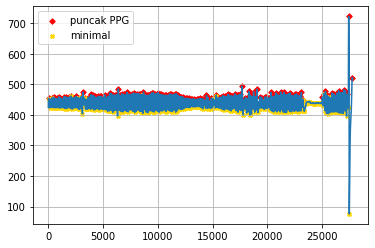

In [ ]:
# x and y definition
x= np.linspace(0,long1,long) 
y= ppg

#find peak
peaks = find_peaks(y, height=445, threshold=0, distance=10)
height = peaks[1]['peak_heights']
peak_post= x[peaks[0]]

  
print("posisi titik puncak :", peak_post)


#menemukan nilai minimum
y2=y*-1
minima=find_peaks(y2)
min_pos=x[minima[0]]
min_height=y2[minima[0]]

#print titik puncak
peak_coordinate=peak_post
    #print(peak_coordinate)
#banyaknya puncak
    # print(len(peak_coordinate)) 
    #output 40
#data titik ke2 sampai 40
data1=peak_coordinate[1:]
#data titik ke1-39
data2=peak_coordinate[:-1]
#jarak antar puncak (pengurangan array)
distance= data1-data2
#mencari rata-rata jarak
total = np.sum(distance)
totaldistance = total
average= totaldistance/len(distance)
#pengolahan data delay 10
# RR = 10*average
# HR= 60000/RR

#pengolahan data delay 05
RR=average*5
HR=60000/RR

#print(min(peak_post))
print("----------------------------------------------------------------------")
print("jarak antar puncak :", distance)   #selisih
print("----------------------------------------------------------------------")
print("jarak terdekat :", min(distance))
print("----------------------------------------------------------------------")
print("jarak terjauh :", max(distance))
print("----------------------------------------------------------------------")
print("rata-rata jarak :", average)
print("----------------------------------------------------------------------")
print("banyaknya peak :", len(distance))
print("----------------------------------------------------------------------")
print("jumlah jarak:", total)
print("----------------------------------------------------------------------")
print("HR", HR)

#plotting
fig = plt.figure()
ax= fig.subplots()
ax.plot(x,y)
ax.scatter(peak_post, height, color='r', s=15, marker='D', label='puncak PPG')
ax.scatter(min_pos, min_height*-1, color='gold', s=15, marker='X', label='minimal')
ax.legend()
ax.grid()
plt.show() 

In [ ]:
import statistics
sd = statistics.stdev(distance)
sd

125.74994278175684

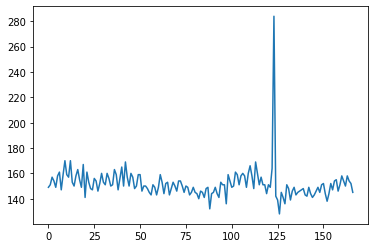

In [ ]:
RR1 = average + sd
RR2 = average - sd
x = distance
distance = [i for i in x if i > RR2 and i< RR1]
plt.plot(distance)

In [ ]:
diff_sig_2=np.diff(ppg_and_ecg[1])

In [ ]:
diff_sig_2.ndim

1

In [ ]:
# HR will probably not go below 30 bpm : distance=500*(30/60))
# prominence found experimentally
peaks_2, _ = find_peaks(diff_sig_2, distance=50*(30/60), prominence=0.001)
peaks_2

array([], dtype=int64)

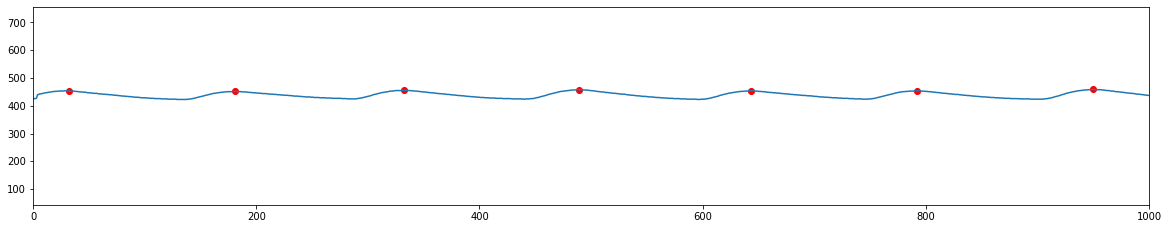

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(ppg_and_ecg)
plt.scatter(peak_post, ppg [peak_post], color="red")
plt.gca().set_xlim(0, 1000)
#plt.subplot(2,1,2)
#plt.plot(diff_sig_2)
#plt.scatter(peak_post, diff_sig_2[peak_post], color="red")
plt.gca().set_xlim(0, 1000)
plt.show()

In [ ]:
rr_new = np.array(distance)

In [ ]:
rr_2 = np.diff(peak_post)
corr_rr_2 = rr_new*10

In [ ]:
corr_rr_2

array([1490., 1510., 1570., 1540., 1490., 1580., 1610., 1470., 1590.,
       1700., 1590., 1570., 1700., 1530., 1500., 1580., 1630., 1550.,
       1490., 1670., 1410., 1610., 1530., 1480., 1470., 1560., 1540.,
       1460., 1520., 1600., 1530., 1510., 1600., 1560., 1500., 1510.,
       1630., 1590., 1470., 1560., 1650., 1500., 1690., 1570., 1500.,
       1600., 1570., 1480., 1500., 1590., 1590., 1460., 1500., 1500.,
       1480., 1450., 1430., 1510., 1490., 1430., 1490., 1590., 1530.,
       1440., 1520., 1530., 1430., 1480., 1530., 1500., 1460., 1540.,
       1540., 1500., 1450., 1500., 1490., 1430., 1450., 1490., 1450.,
       1440., 1400., 1460., 1450., 1410., 1480., 1490., 1320., 1440.,
       1450., 1490., 1440., 1410., 1530., 1510., 1510., 1360., 1590.,
       1540., 1490., 1500., 1610., 1590., 1510., 1580., 1600., 1580.,
       1490., 1600., 1660., 1580., 1480., 1690., 1600., 1510., 1570.,
       1510., 1510., 1440., 1510., 1490., 1640., 2840., 1420., 1390.,
       1280., 1450.,

In [ ]:
timedomain(corr_rr_2)

{'Max HR (beats/min)': 46.875,
 "Mean HR (Kubios' style) (beats/min)": 39.5844032710465,
 'Mean HR (beats/min)': 39.77338097883152,
 'Mean RR (ms)': 1515.748502994012,
 'Min HR (beats/min)': 21.12676056338028,
 'NNxx': 86,
 'RMSSD (ms)': 165.15782885995728,
 'STD HR (beats/min)': 2.39602807858621,
 'STD RR/SDNN (ms)': 125.67140493651311,
 'pNNxx (%)': 51.49700598802395}

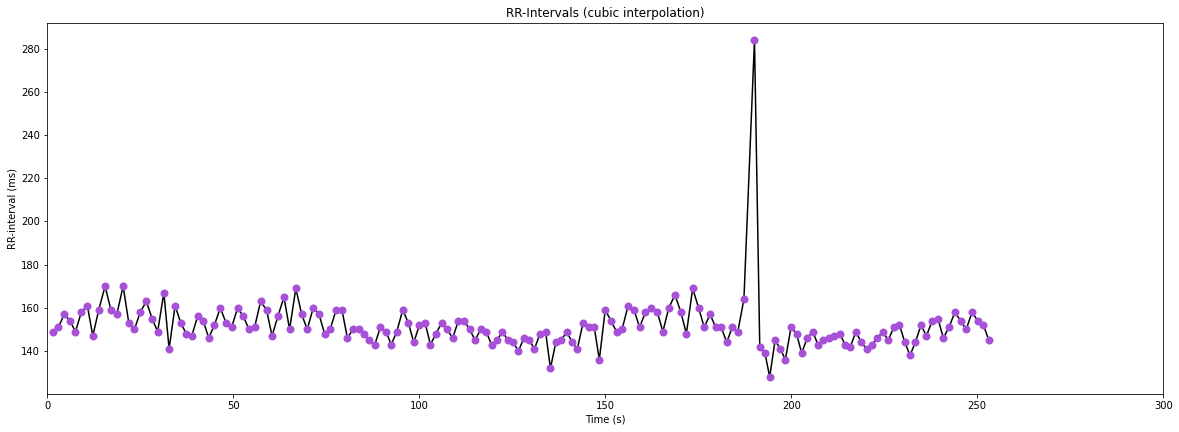

In [ ]:
x_2 = np.cumsum(rr_new)/ 100.0
f_2 = interp1d(x_2, rr_new, kind='cubic',fill_value="extrapolate")

# sample rate for interpolation
fs = 4.0
steps = 1 / fs

# now we can sample from interpolation function
xx_2 = np.arange(1, np.max(x_2), steps)

rr_interpolated = f_2(xx_2)

plt.figure(figsize=(20, 15))

plt.subplot(211)
plt.title("RR intervals")
plt.plot(x_2, rr_new, color="k", markerfacecolor="#A651D8", markeredgewidth=0, marker="o", markersize=8)
plt.xlabel("Time (s)")
plt.ylabel("RR-interval (ms)")
plt.title("Interpolated")
plt.gca().set_xlim(0, 300)

#plt.subplot(212)
plt.title("RR-Intervals (cubic interpolation)")
#plt.plot(xx_2, rr_interpolated_2, color="k", markerfacecolor="#51A6D8", markeredgewidth=0, marker="o", markersize=8)
plt.gca().set_xlim(0, 300)
plt.xlabel("Time (s)")
plt.ylabel("RR-interval (ms)")
plt.show()

In [ ]:
print("Frequency domain metrics:")
results_2, fxx_2, pxx_2 = frequency_domain(rr_interpolated)

for k, v in results_2.items():
    print("- %s: %.2f" % (k, v))

Frequency domain metrics:
- Power VLF (ms2): 31.51
- Power LF (ms2): 157.03
- Power HF (ms2): 77.26
- Power Total (ms2): 265.80
- LF/HF: 2.03
- Peak VLF (Hz): 0.03
- Peak LF (Hz): 0.06
- Peak HF (Hz): 0.19
- Fraction LF (nu): 67.02
- Fraction HF (nu): 32.98


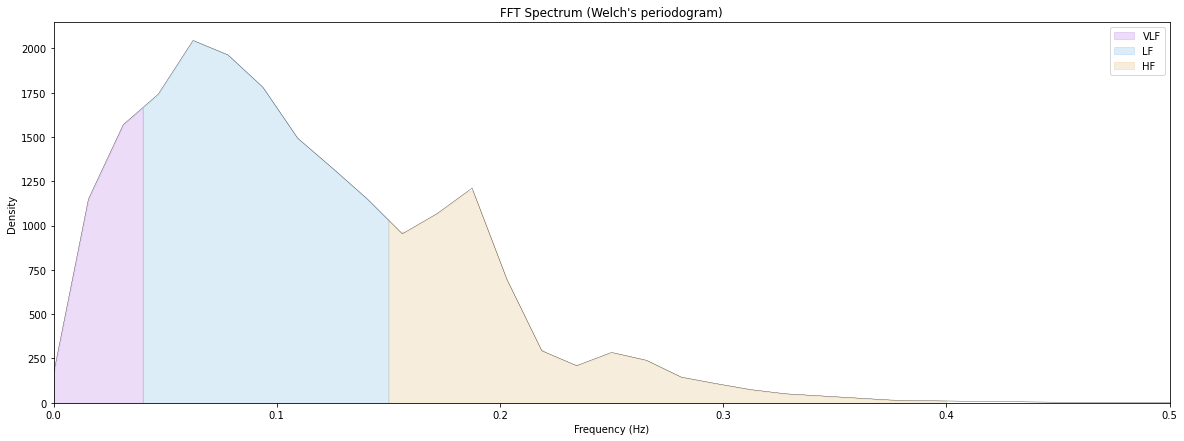

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(fxx_2, pxx_2, color="k", linewidth=0.3)
plt.title("FFT Spectrum (Welch's periodogram)")

# create interpolation function for plotting frequency bands
psd_f = interp1d(fxx_2, pxx_2)

# setup frequency bands for plotting
x_vlf = np.linspace(0, 0.04, 100)
x_lf = np.linspace(0.04, 0.15, 100)
x_hf = np.linspace(0.15, 0.4, 100)

plt.gca().fill_between(x_vlf, psd_f(x_vlf), alpha=0.2, color="#A651D8", label="VLF")
plt.gca().fill_between(x_lf, psd_f(x_lf), alpha=0.2, color="#51A6D8", label="LF")
plt.gca().fill_between(x_hf, psd_f(x_hf), alpha=0.2, color="#D8A651", label="HF")

plt.gca().set_xlim(0, 0.5)
plt.gca().set_ylim(0)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Density")
plt.legend()
plt.show()

SD1: 11.678 ms
SD2: 13.457 ms


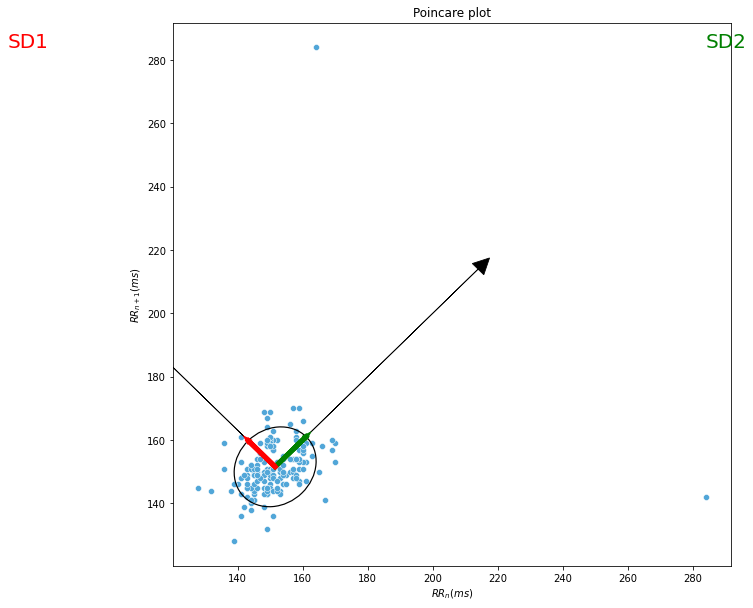

In [ ]:
import seaborn as sns
from matplotlib.patches import Ellipse
sd1_2, sd2_2 = plot_poincare(rr_new)
print("SD1: %.3f ms" % sd1_2)
print("SD2: %.3f ms" % sd2_2)

In [ ]:
ecg_signals, info  = nk.ecg_process(ppg, sampling_rate=100)

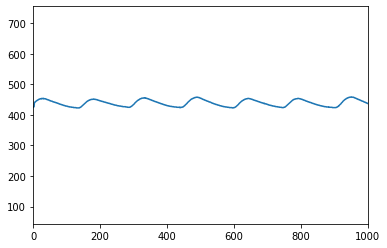

In [ ]:
plt.plot(ppg)
plt.scatter(info['ECG_R_Peaks'], ppg[info['ECG_R_Peaks']], color="red")
plt.gca().set_xlim(0, 1000)
plt.show()

In [ ]:
rr_ecg = np.diff(info['ECG_R_Peaks'])
corr_rr_ecg = rr_ecg*10

In [ ]:
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values

In [ ]:
rr_intervals_list = info['ECG_R_Peaks']

In [ ]:
import pyhrv.tools as tools

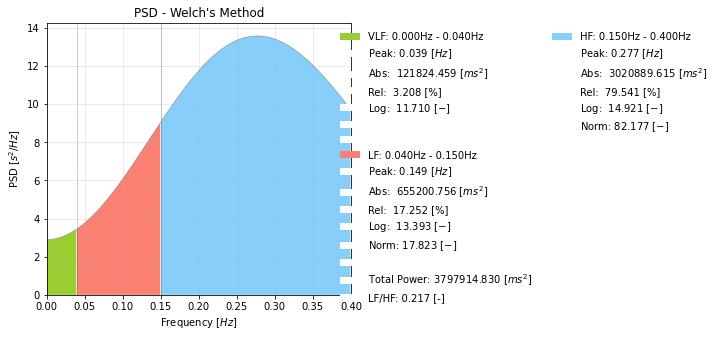

(0.0390625, 0.1494140625, 0.27734375)


In [ ]:
import pyhrv.frequency_domain as fd
nni = tools.nn_intervals(rr_intervals_list)
result = fd.welch_psd(nni=nni)
# Access peak frequencies using the key 'fft_peak'
print(result['fft_peak'])

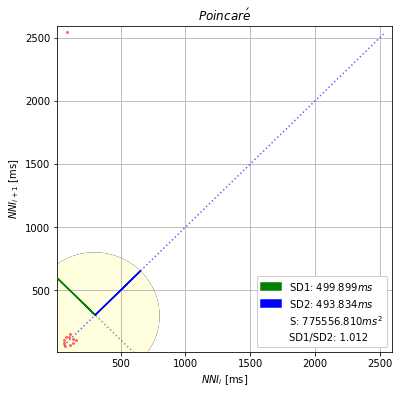

499.8993865711528


In [ ]:
import pyhrv.nonlinear as nl
result = nl.poincare(nni)

print(result['sd1'])

In [ ]:
result = nl.sample_entropy(nni)
print(result['sampen'])

0.2231435513142097


- Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lesspinasse, F., Pham, H., Schölzel, C., & S H Chen, A. (2020). NeuroKit2: A Python Toolbox for Neurophysiological Signal Processing. Retrieved May 07, 2020, from https://github.com/neuropsychology/NeuroKit
- https://www.kaggle.com/stetelepta/exploring-heart-rate-variability-using-python